In [1]:
from ultralytics import YOLO
import cv2

In [2]:
# Load trained model
model = YOLO("runs/detect/accident_yolov87/weights/best.pt")

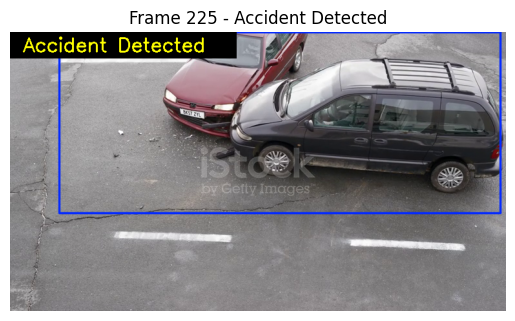

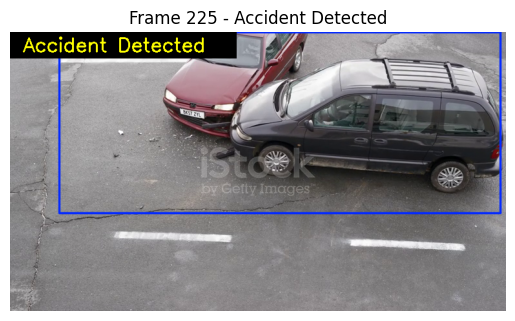

In [12]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Load YOLOv8 model
model = YOLO("runs/detect/accident_yolov87/weights/best.pt")

# Load video
cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\New folder\WhatsApp Video 2024-11-01 at 10.30.00 AM.mp4")

frame_index = 0
frame_skip = 5  # Show every nth frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_index % frame_skip == 0:
        results = model.predict(source=frame, save=False, imgsz=640, conf=0.5)
        annotated_frame = results[0].plot()

        # Display label
        label = "Accident Detected" if len(results[0].boxes) > 0 else "No Accident"
        cv2.rectangle(annotated_frame, (0, 0), (350, 40), (0, 0, 0), -1)
        cv2.putText(annotated_frame, label, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
        
        # Convert to RGB and display
        rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

        clear_output(wait=True)  # Clear previous frame
        plt.imshow(rgb)
        plt.axis('off')
        plt.title(f"Frame {frame_index} - {label}")
        display(plt.gcf())
        time.sleep(0.04)  # ~25 FPS

    frame_index += 1

cap.release()

